In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from eumap.misc import find_files, ttprint, nan_percentile, GoogleSheet
from eumap.raster import read_rasters, save_rasters
import warnings
import multiprocess as mp
import time
from scipy.special import expit, logit
import warnings
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import train_test_split, cross_val_score, HalvingGridSearchCV, KFold, GroupKFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor
import joblib
import pickle
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from cubist import Cubist
from sklearn.base import BaseEstimator, TransformerMixin
from pathlib import Path

### input
folder = 'http://192.168.1.30:8333/ai4sh-landmasked/model_benchmark'



In [2]:
from benchmark_pipeline import run_benchmark

prop_list = ['ph_cacl2','ph_h2o','oc','bulk_density','N','caco3','K','EC','P','CEC'] #
space_list = ['normal','normal','log1p','normal','log1p','log1p','log1p','log1p','log1p','log1p'] # 
filt_list = [5,5,5,5,5,5,5,5,5,5,5,5,5] #5,5,5,5,

In [3]:
prop_list[9]

'CEC'

processing P
[14:25:41] 0 iteration, training size: 4605
[14:25:46] 1 iteration, training size: 4423
[14:25:51] 2 iteration, training size: 4557
[14:25:56] 3 iteration, training size: 4565
[14:26:02] 4 iteration, training size: 4486
[14:26:08] 5 iteration, training size: 4550
[14:26:13] 6 iteration, training size: 4534
[14:26:18] 7 iteration, training size: 4432
[14:26:24] 8 iteration, training size: 4566
[14:26:29] 9 iteration, training size: 4546
[14:26:36] 10 iteration, training size: 4682
[14:26:41] 11 iteration, training size: 4516
[14:26:46] 12 iteration, training size: 4562
[14:26:51] 13 iteration, training size: 4536
[14:26:56] 14 iteration, training size: 4532
[14:27:02] 15 iteration, training size: 4449
[14:27:07] 16 iteration, training size: 4665
[14:27:12] 17 iteration, training size: 4567
[14:27:18] 18 iteration, training size: 4491
[14:27:23] 19 iteration, training size: 4550
--------------84 features selected for P, threshold: 20---------
n_iterations: 7
n_required_itera

n_iterations: 7
n_required_iterations: 7
n_possible_iterations: 7
min_resources_: 22
max_resources_: 16511
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 972
n_resources: 22
Fitting 5 folds for each of 972 candidates, totalling 4860 fits
----------
iter: 1
n_candidates: 324
n_resources: 66
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
----------
iter: 2
n_candidates: 108
n_resources: 198
Fitting 5 folds for each of 108 candidates, totalling 540 fits
----------
iter: 3
n_candidates: 36
n_resources: 594
Fitting 5 folds for each of 36 candidates, totalling 180 fits
----------
iter: 4
n_candidates: 12
n_resources: 1782
Fitting 5 folds for each of 12 candidates, totalling 60 fits
----------
iter: 5
n_candidates: 4
n_resources: 5346
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 6
n_candidates: 2
n_resources: 16038
Fitting 5 folds for each of 2 candidates, totalling 10 fits
n_iterations: 7
n_required_iterations: 7
n_po

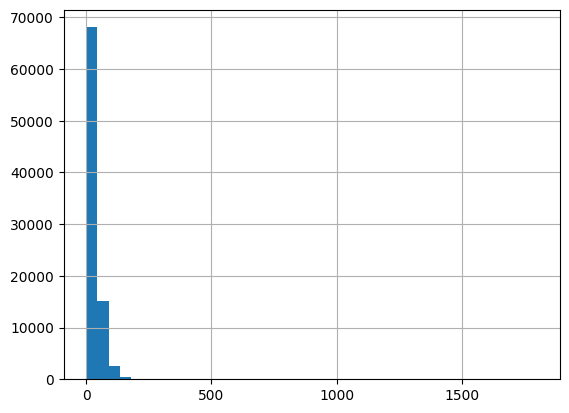

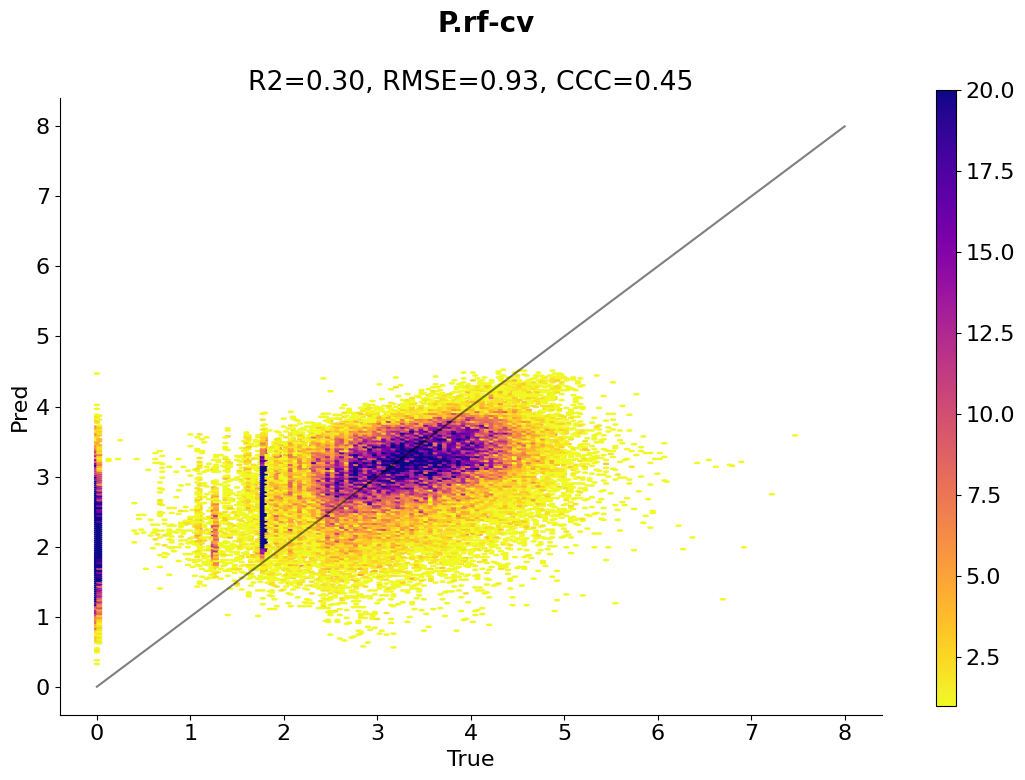

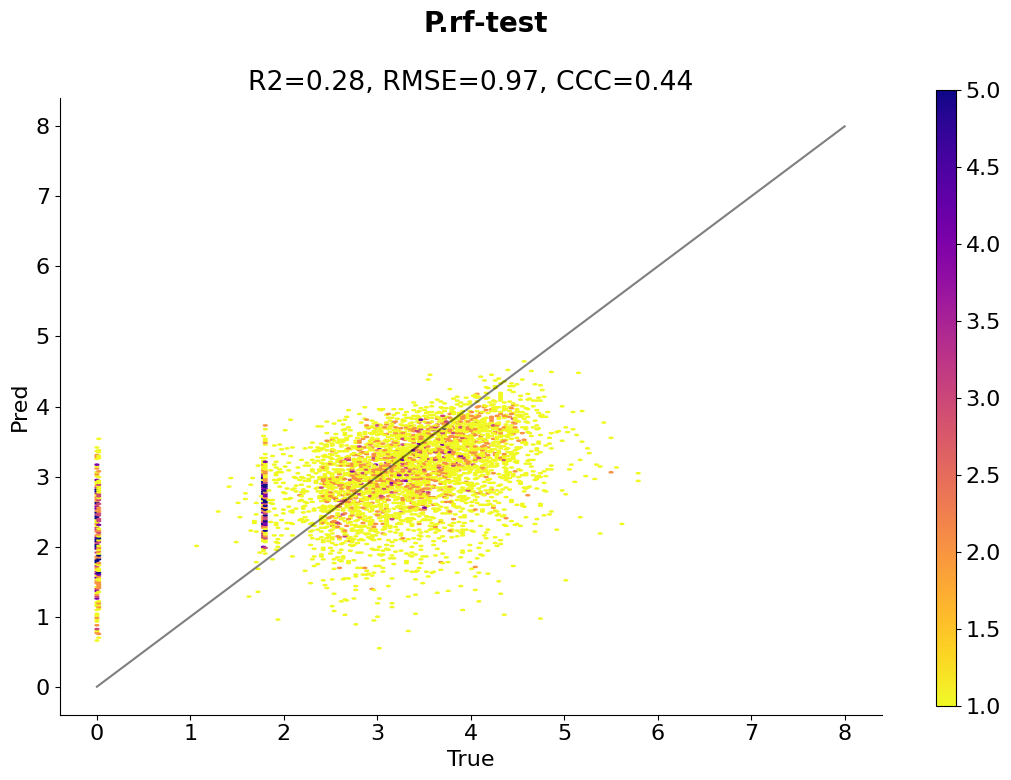

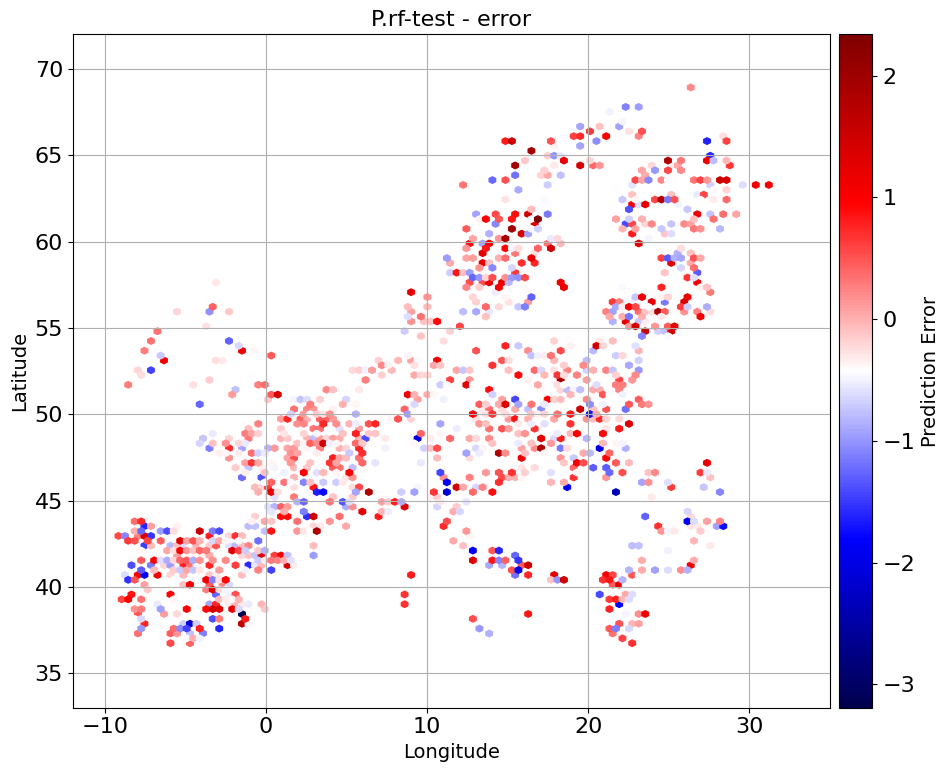

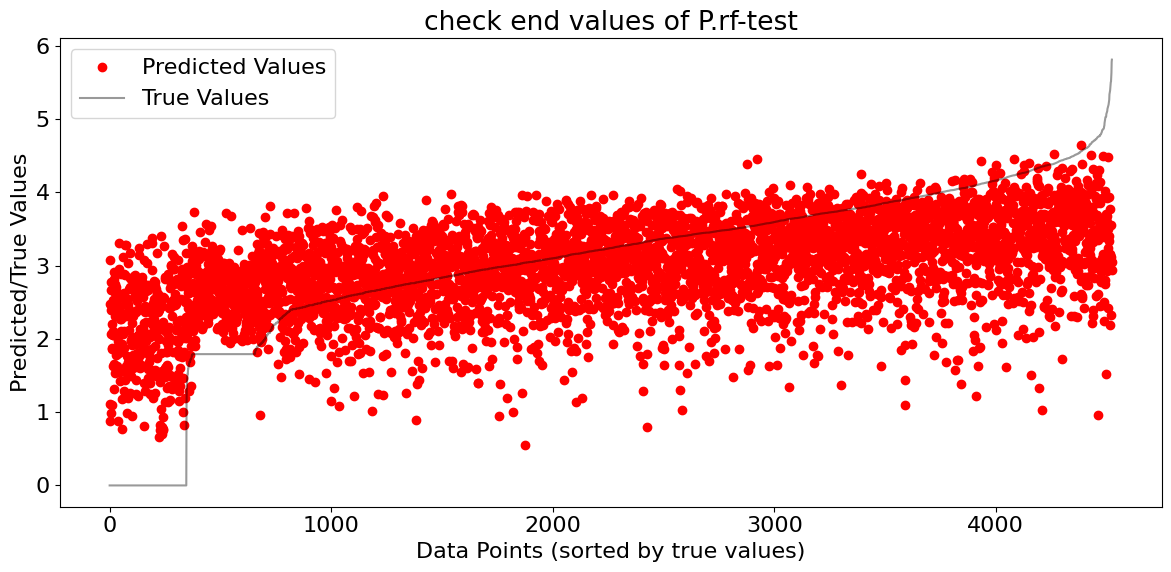

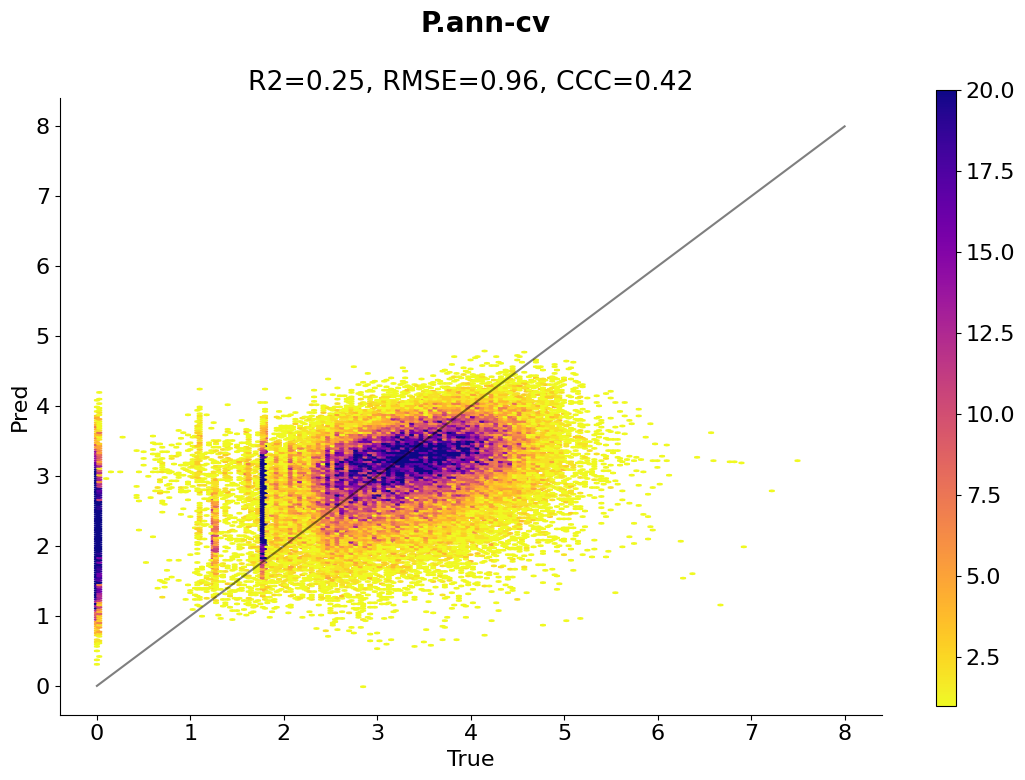

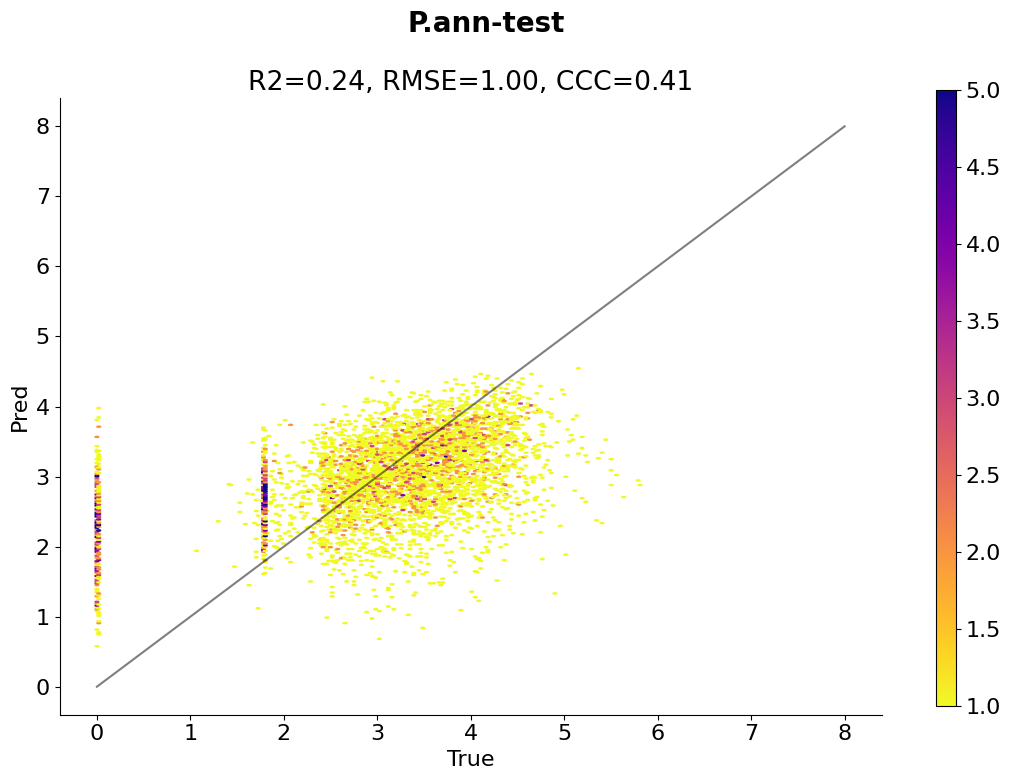

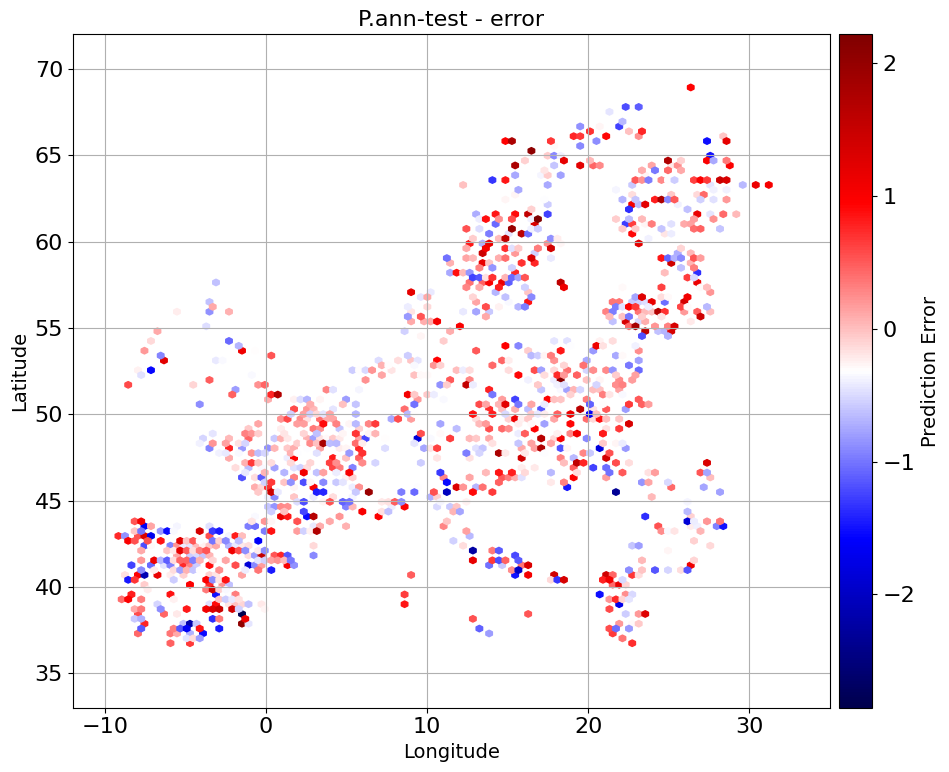

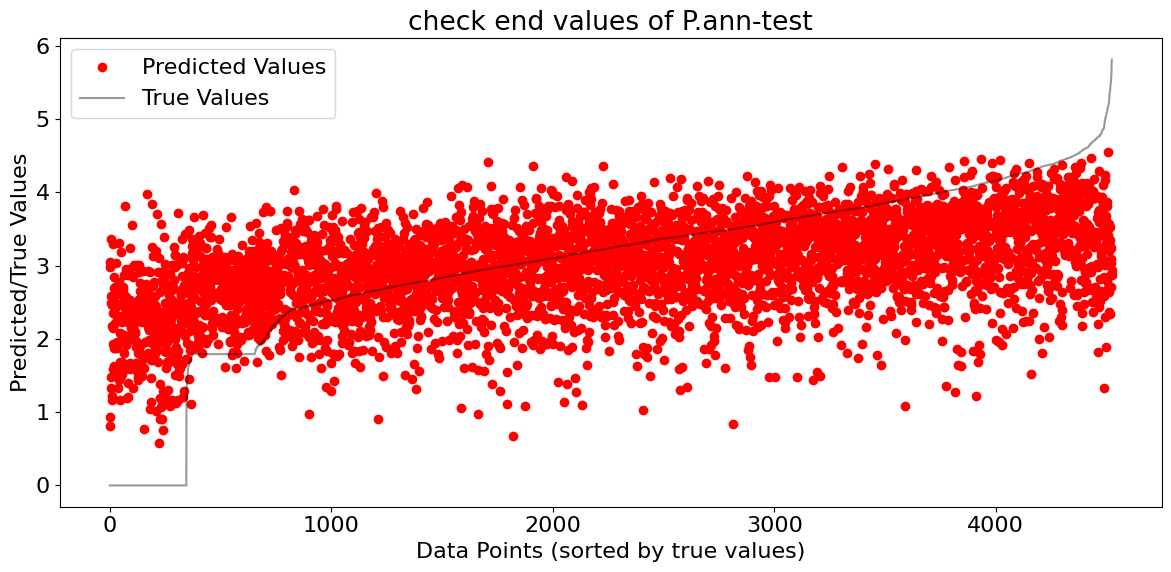

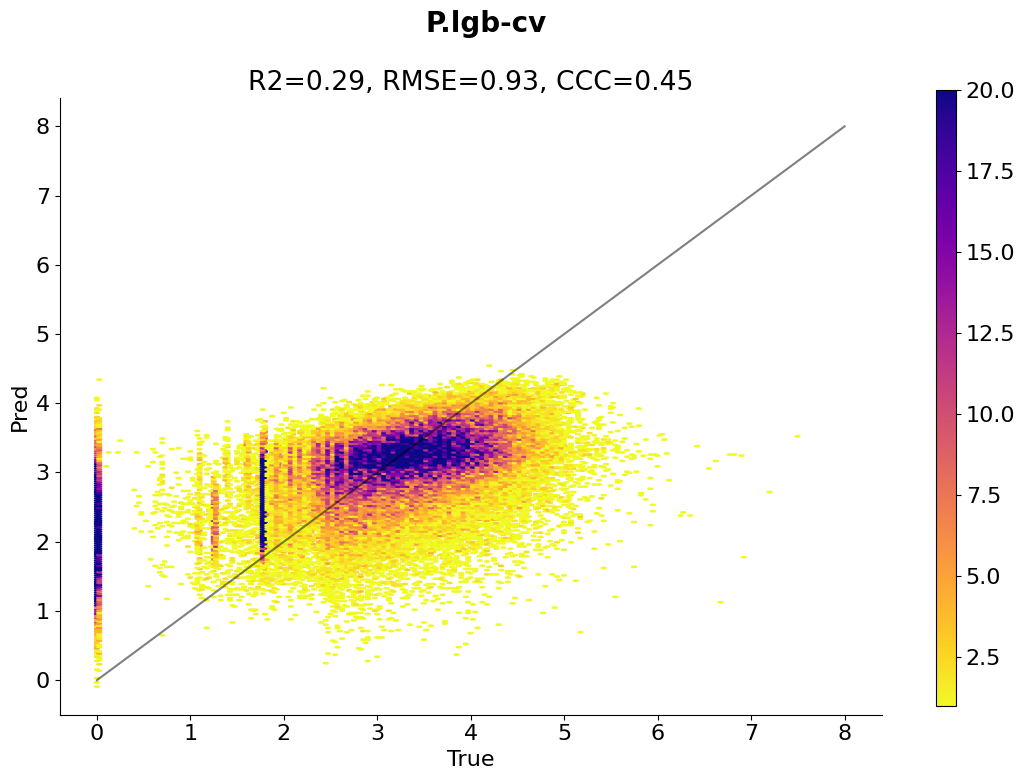

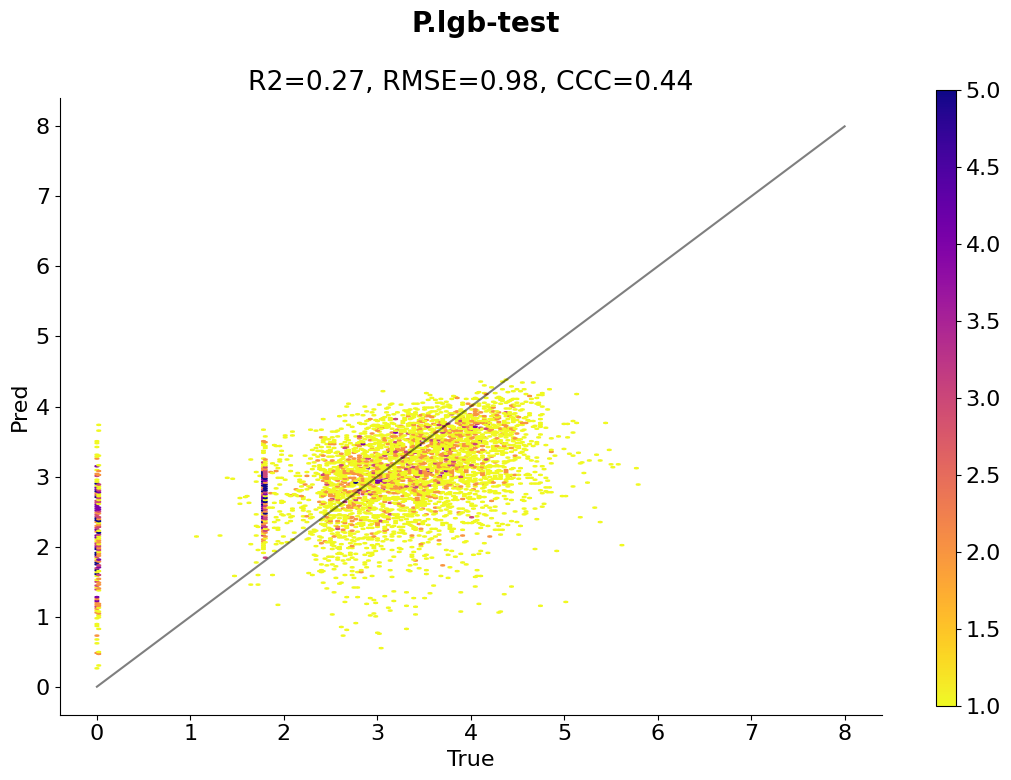

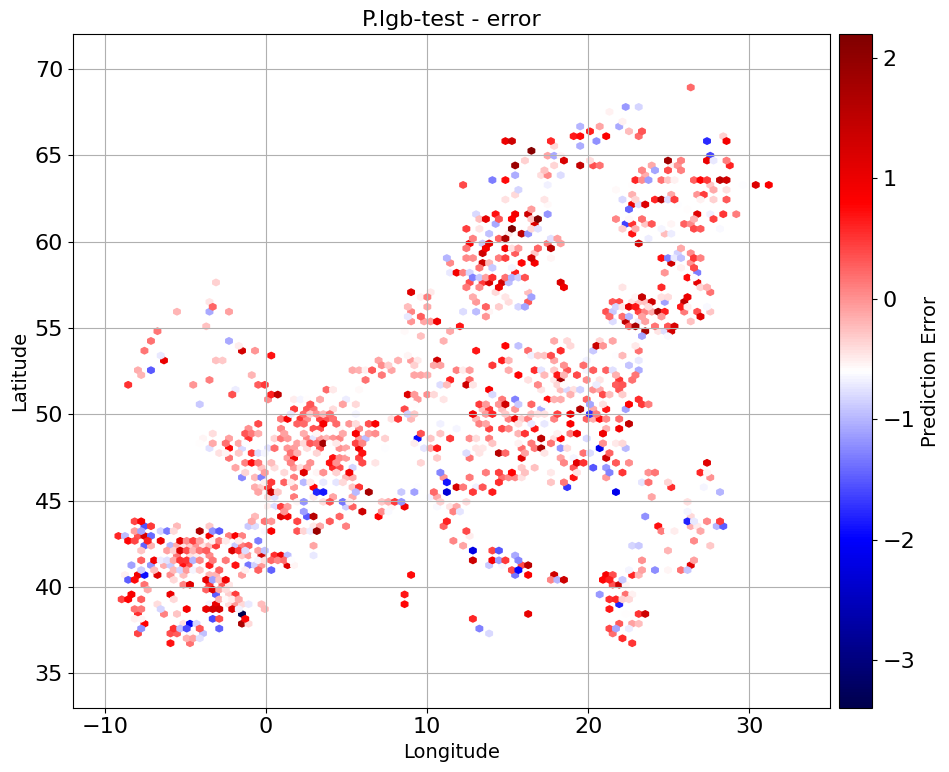

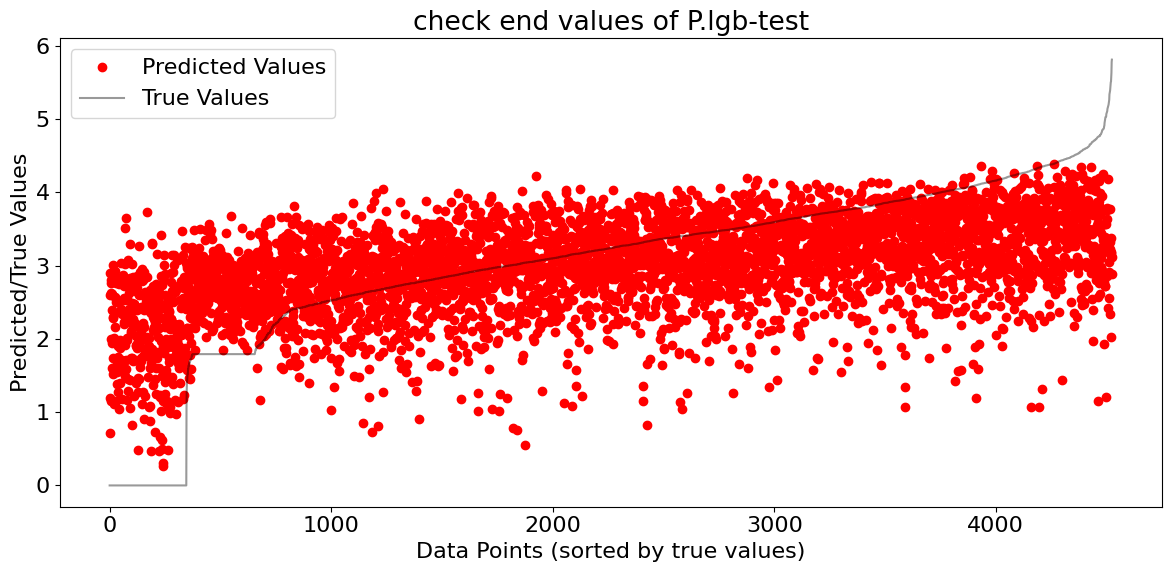

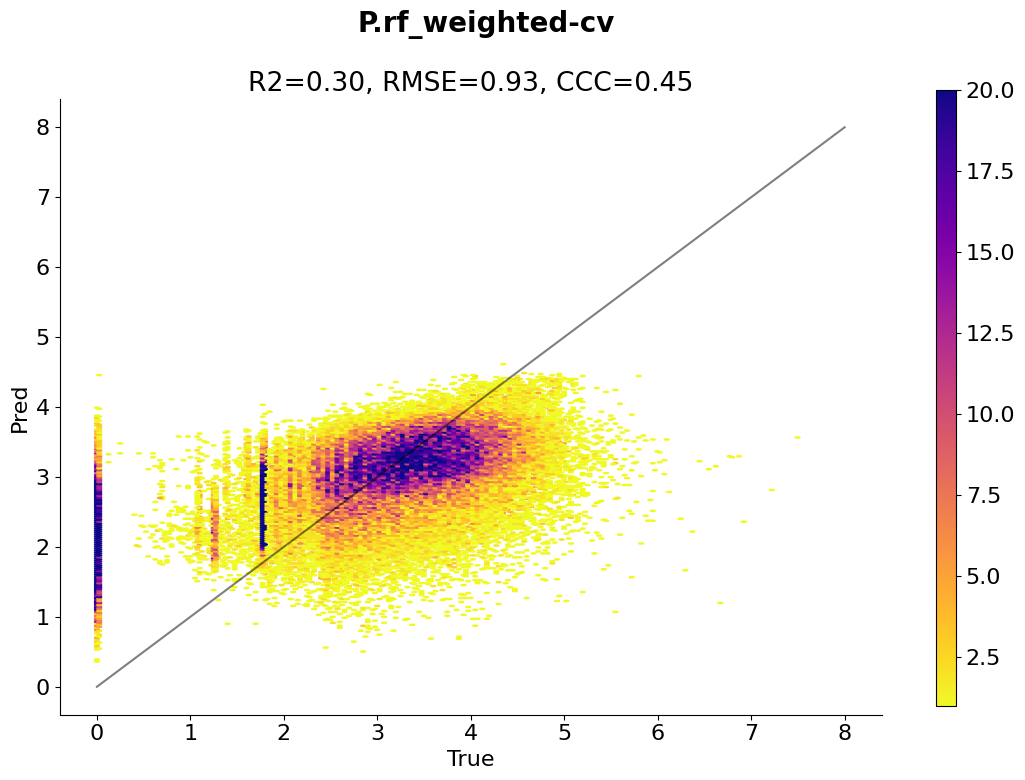

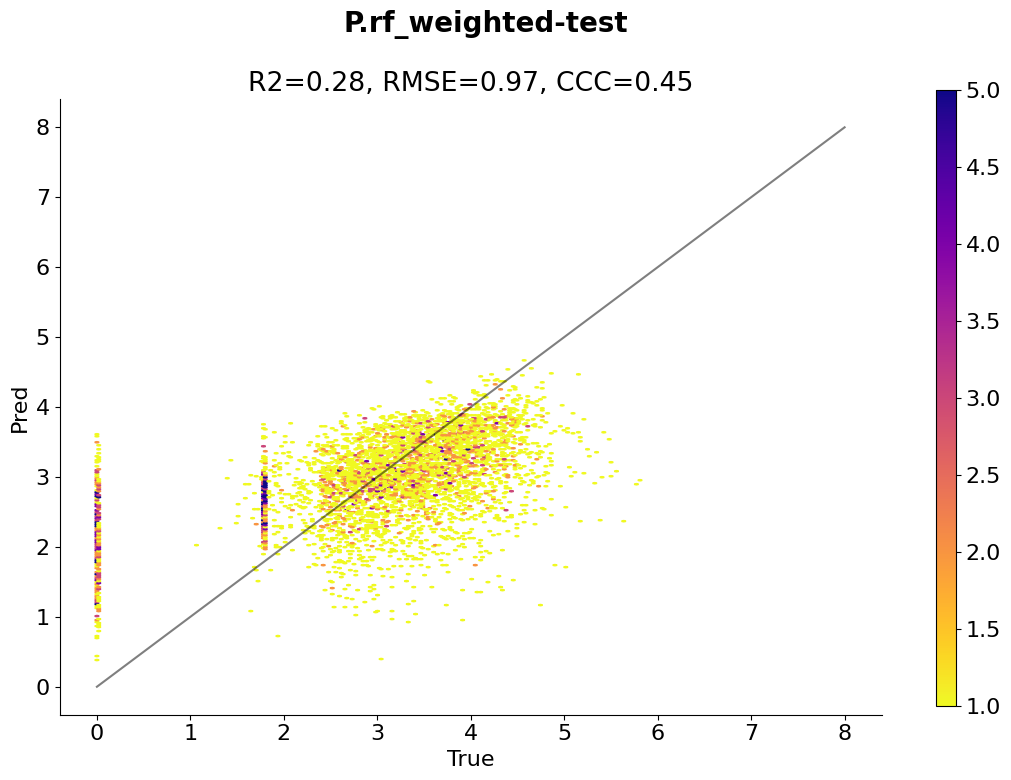

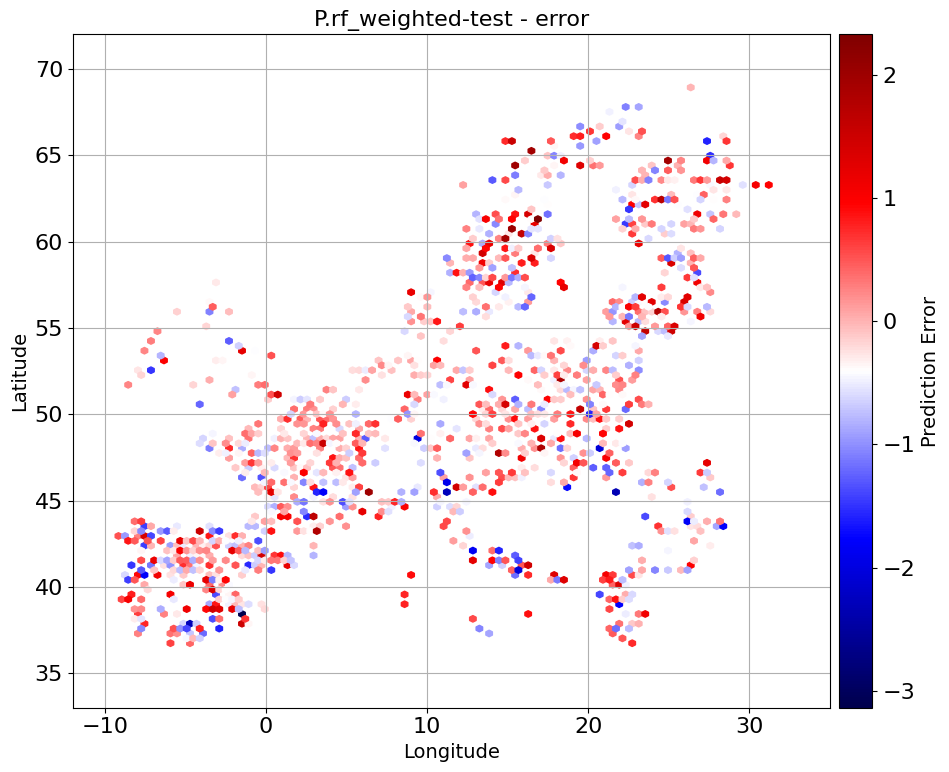

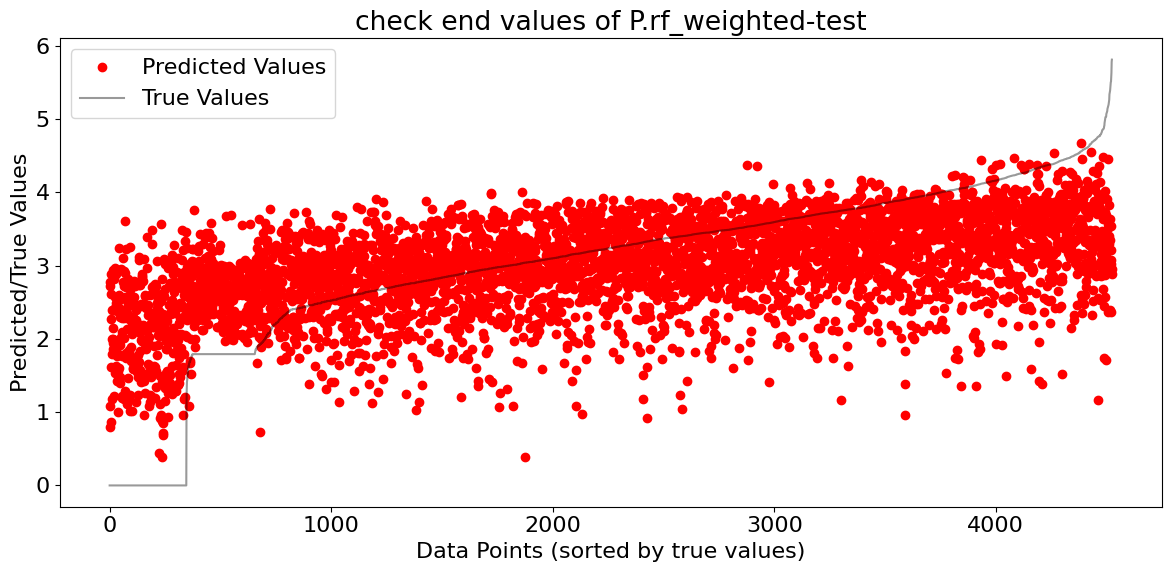

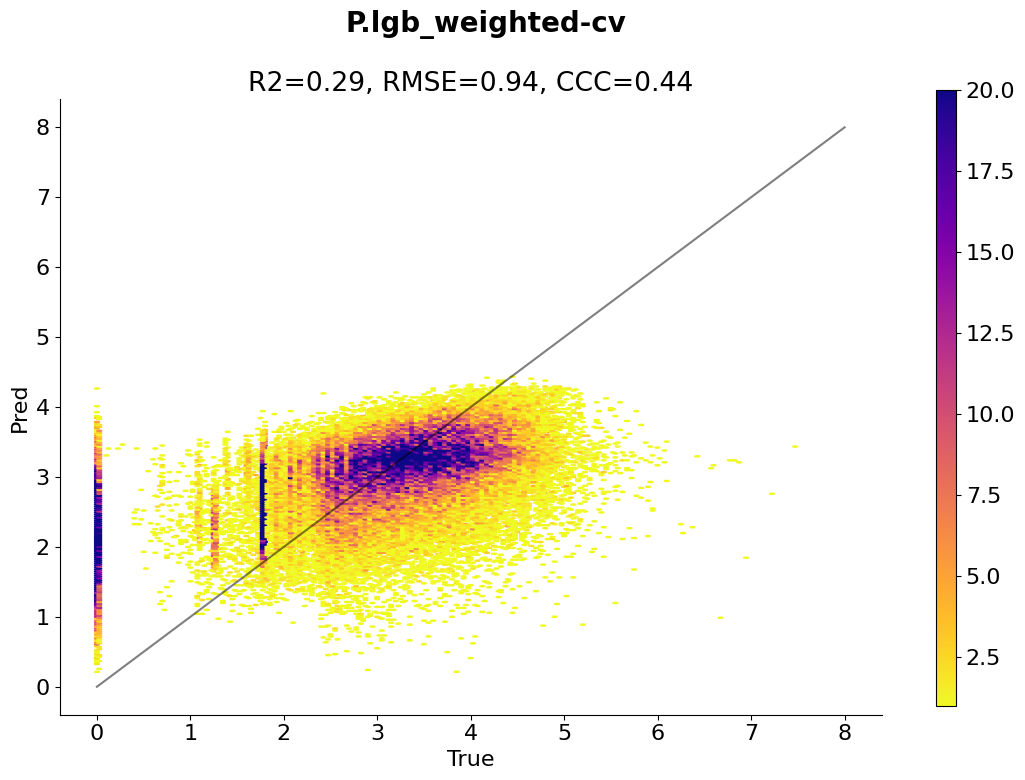

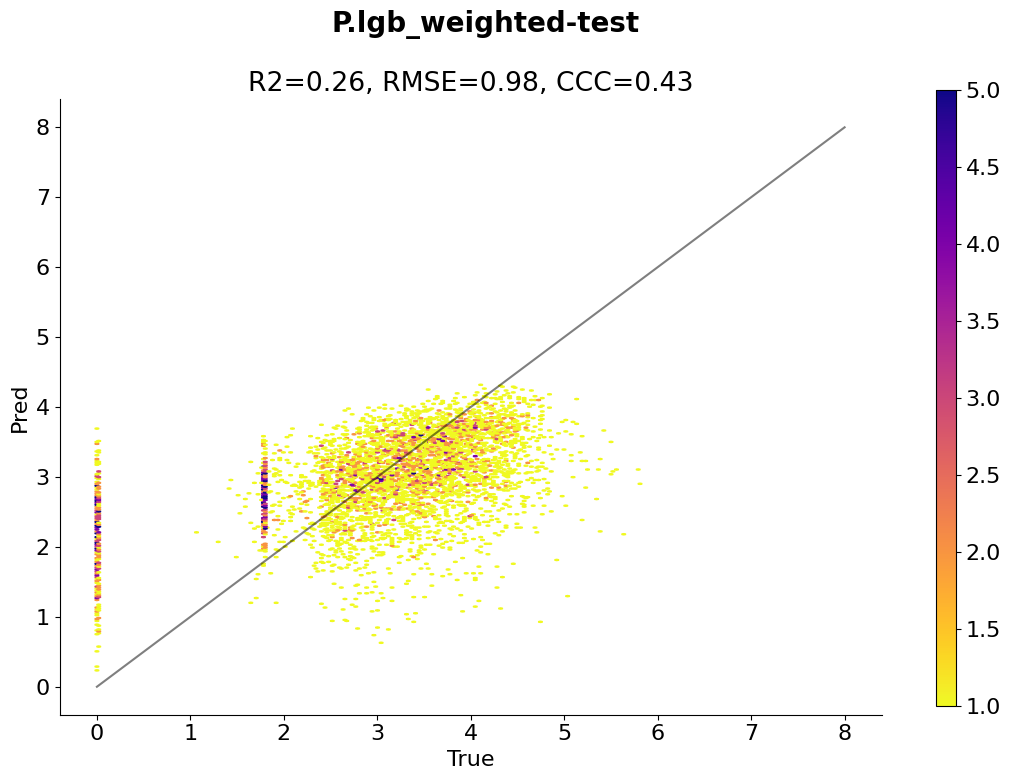

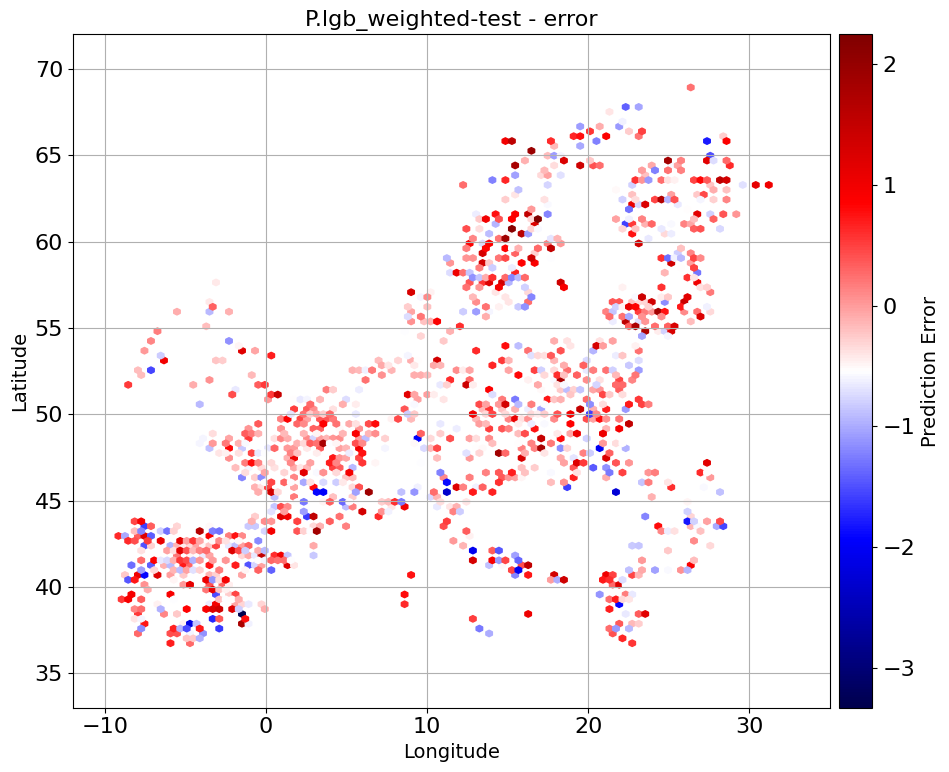

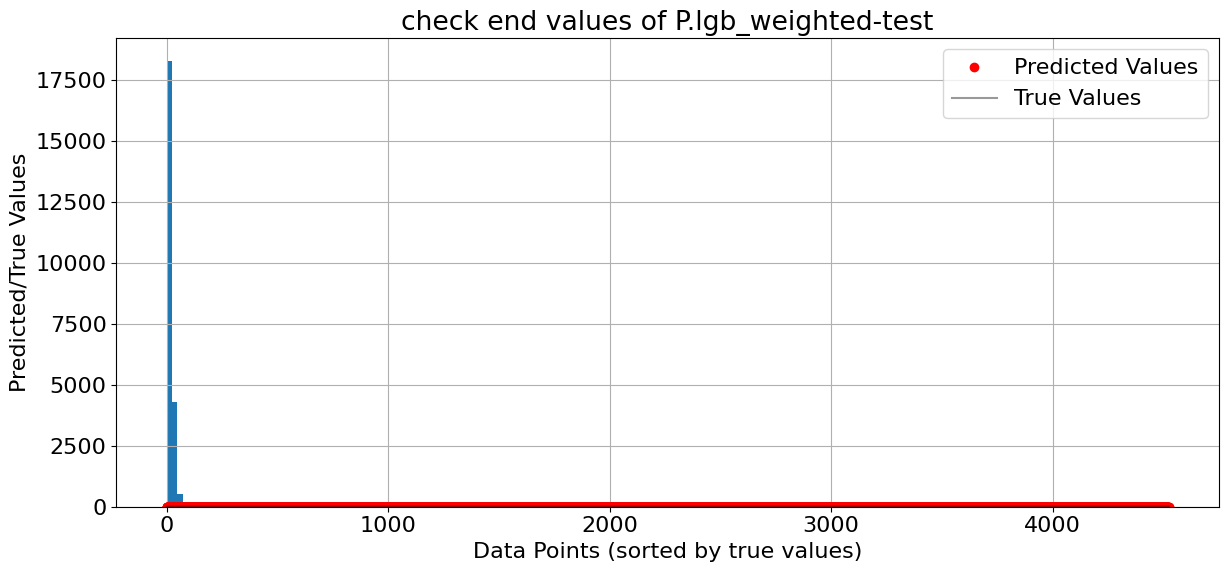

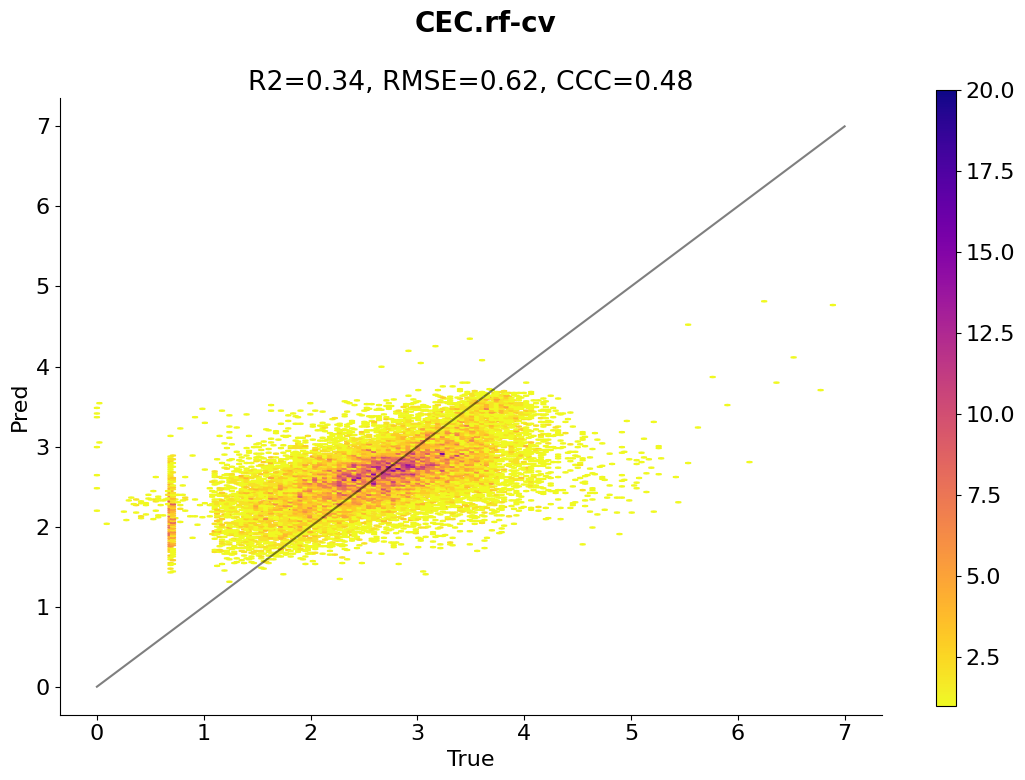

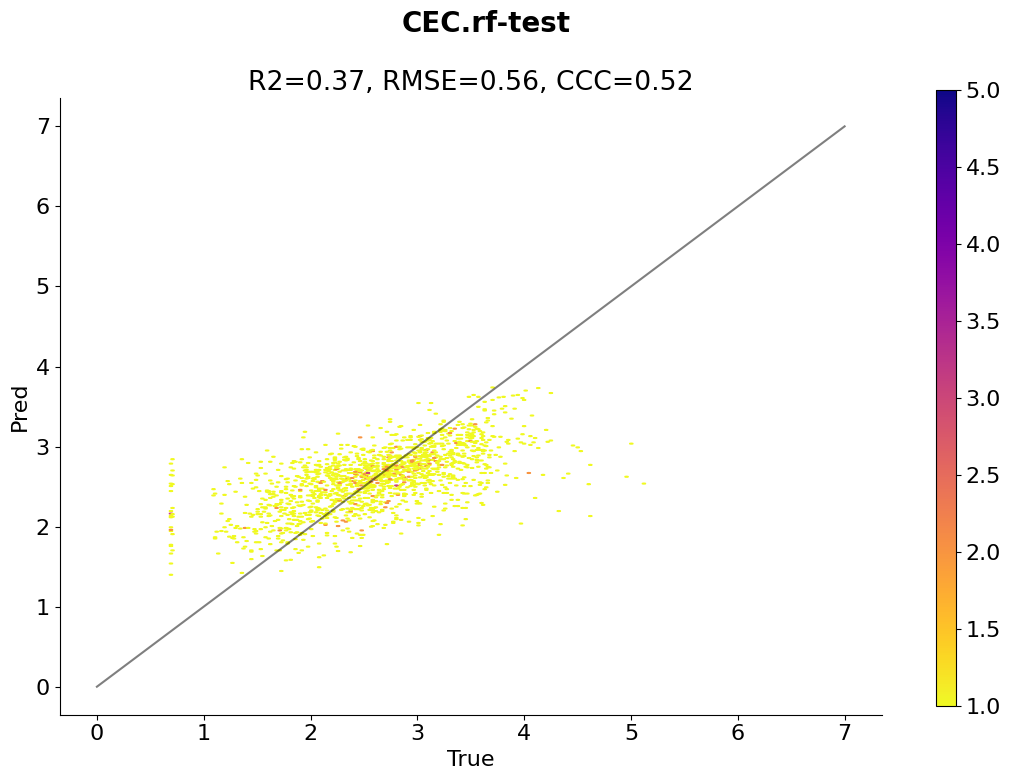

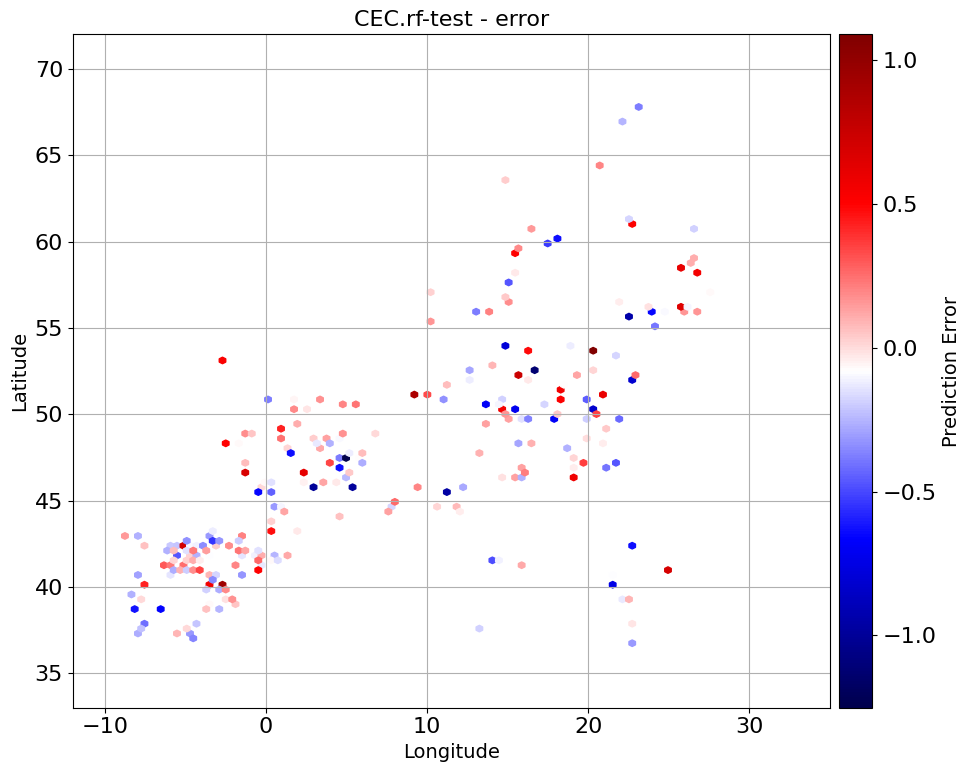

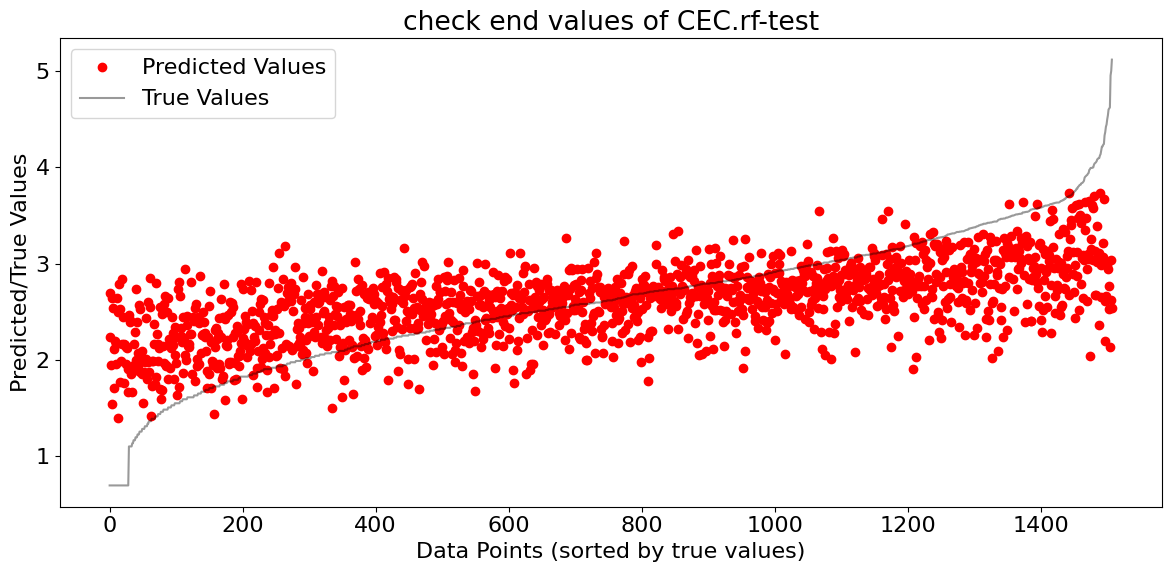

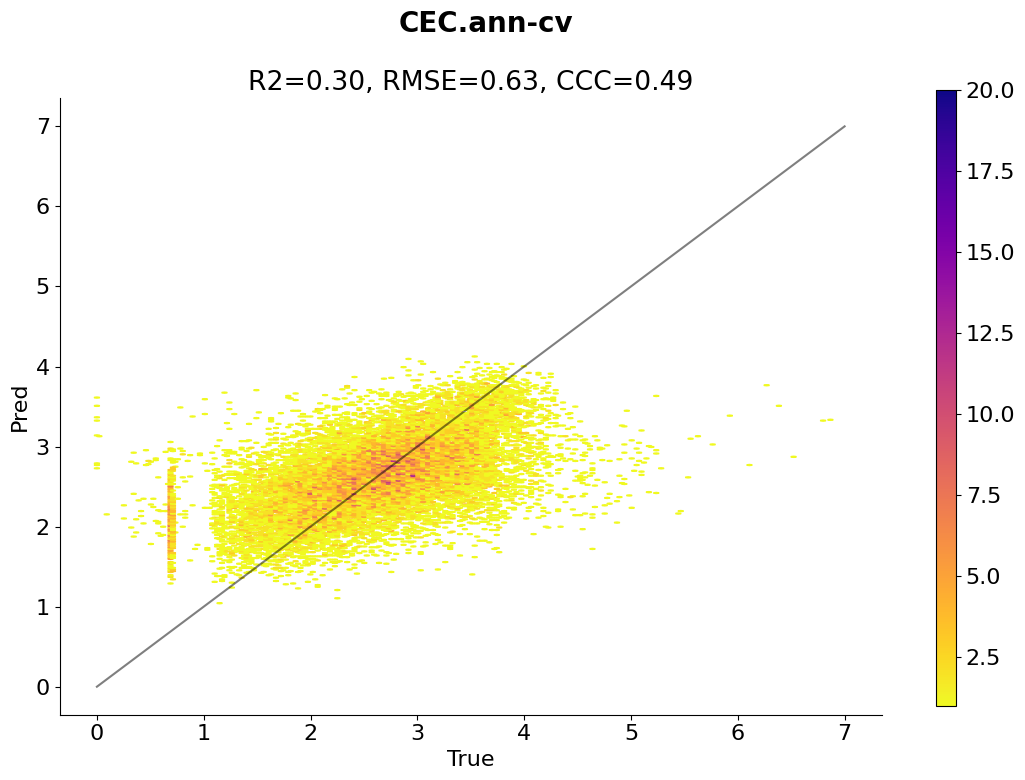

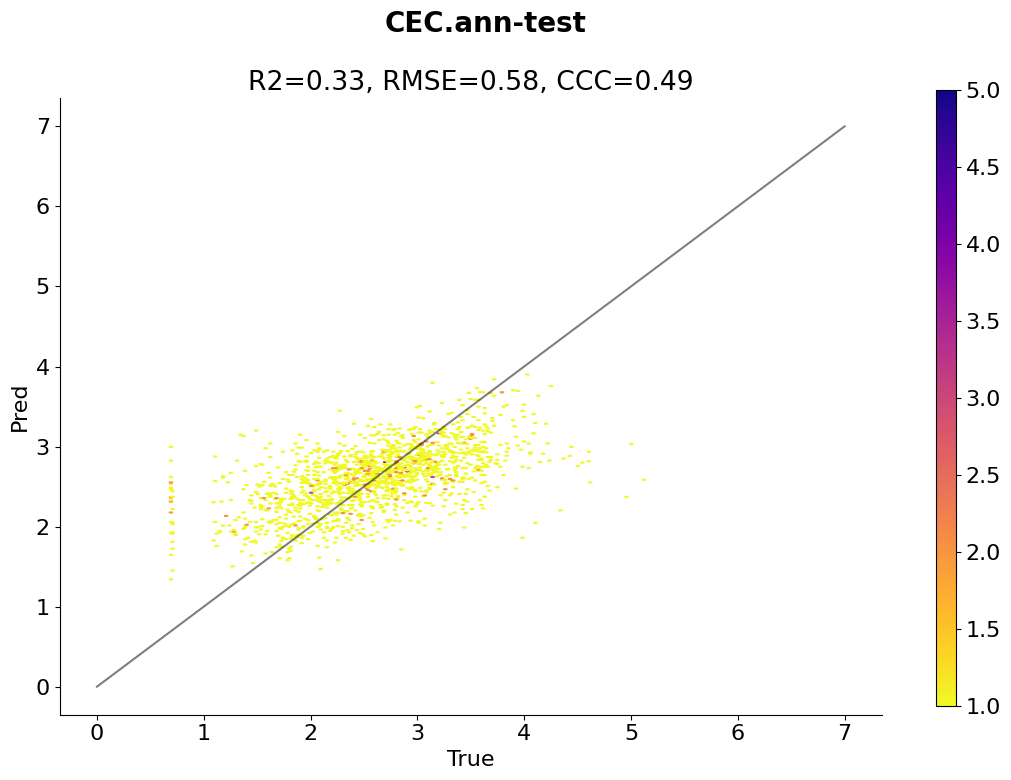

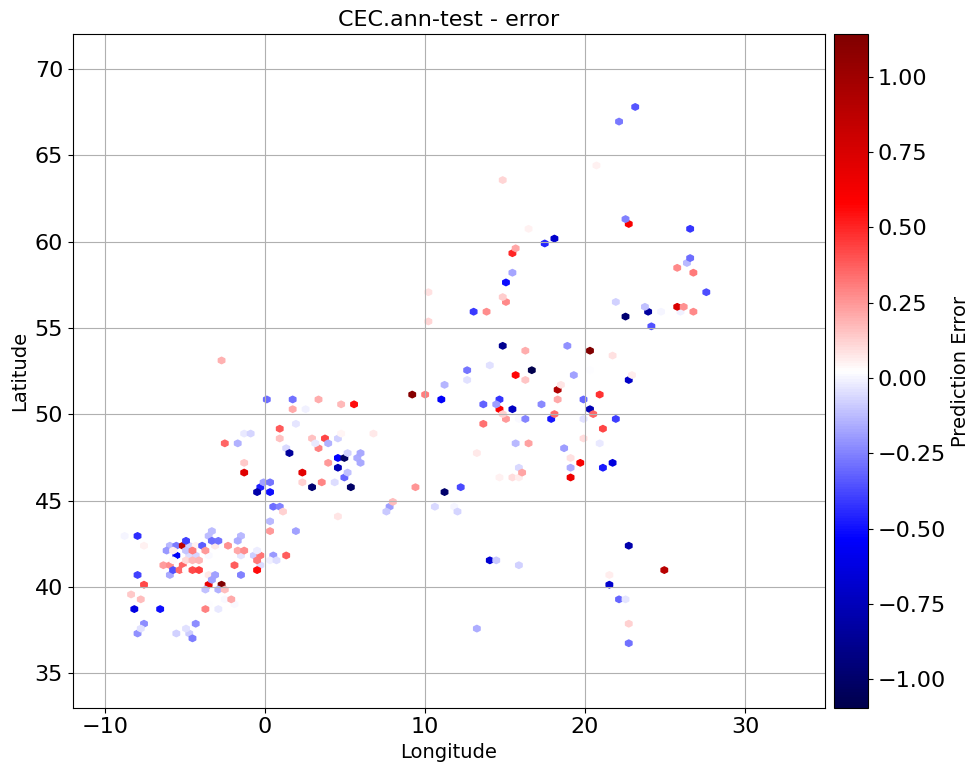

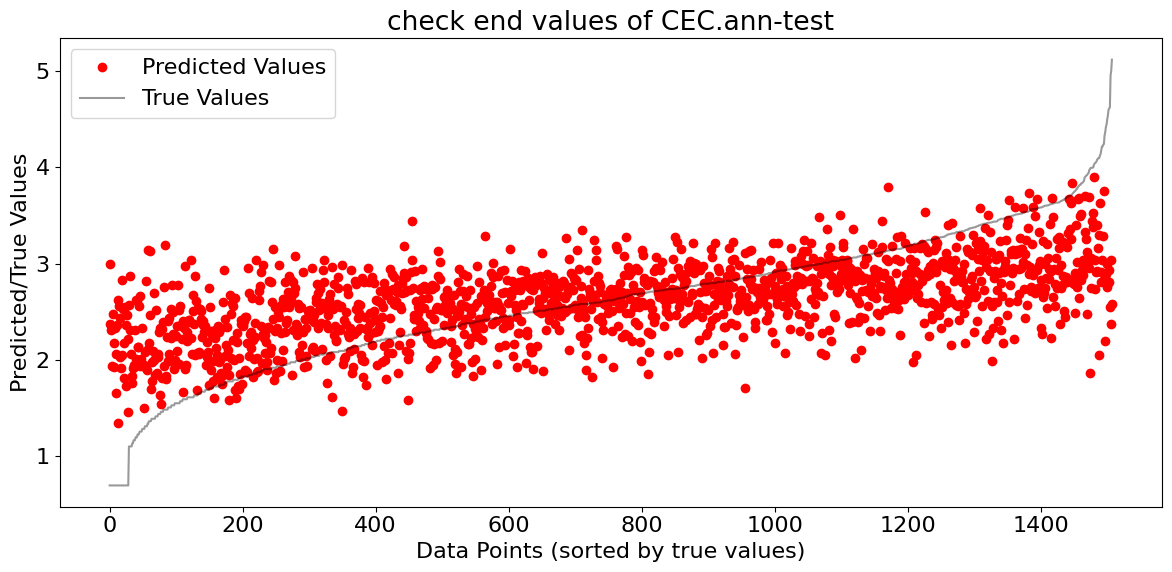

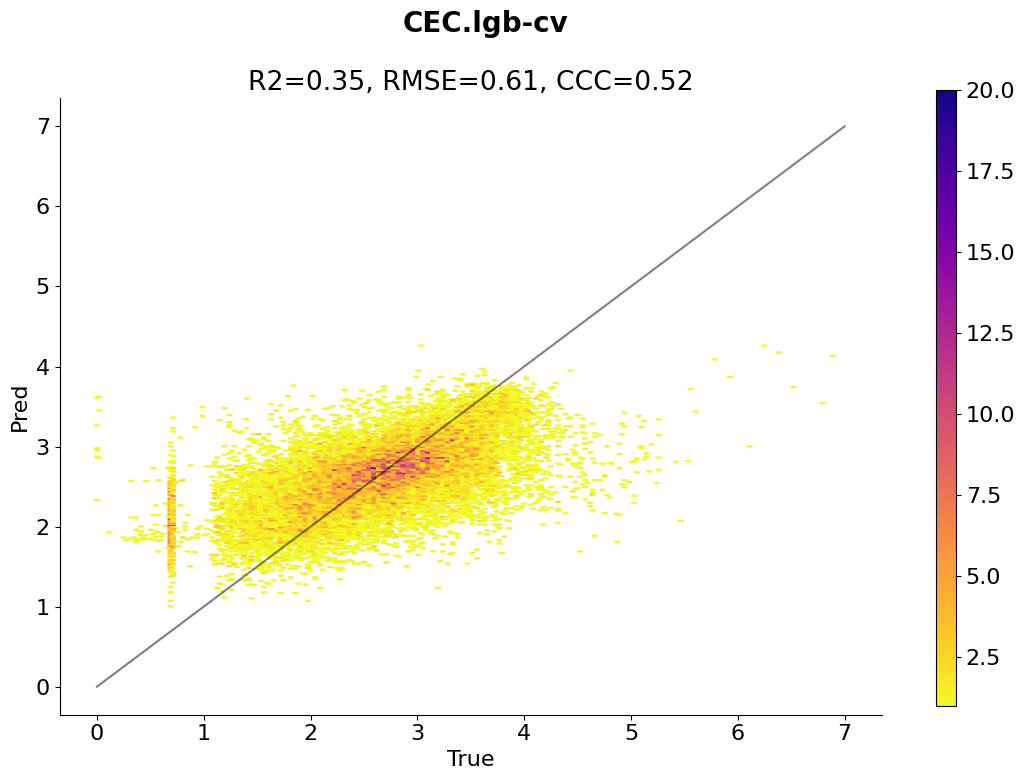

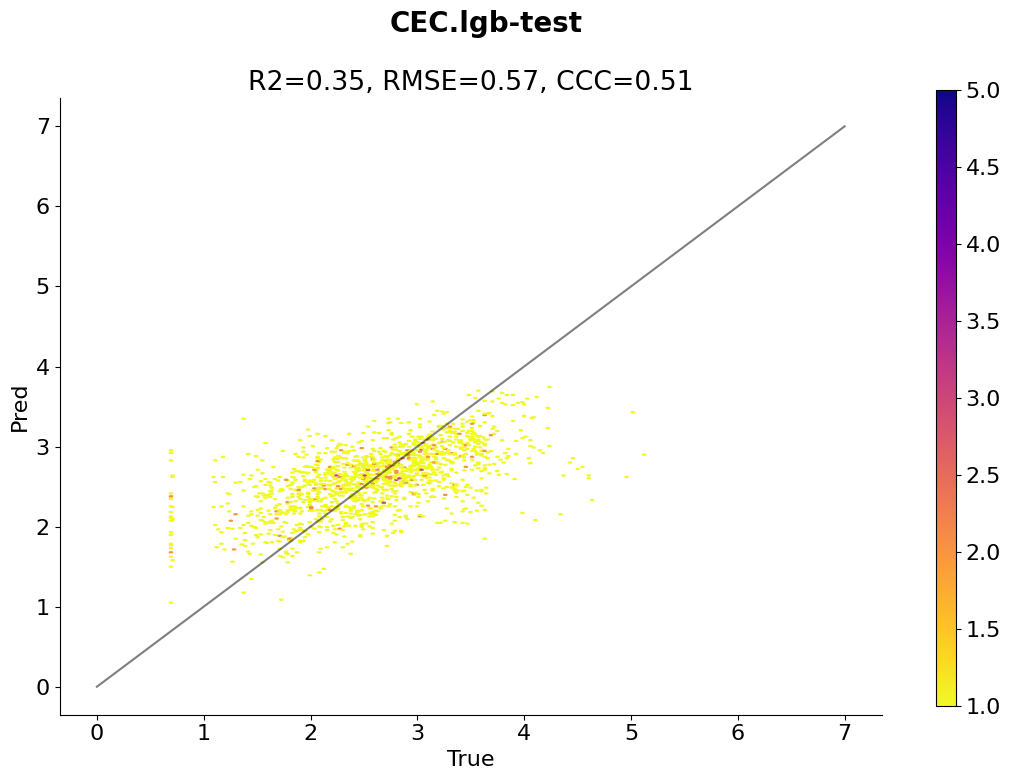

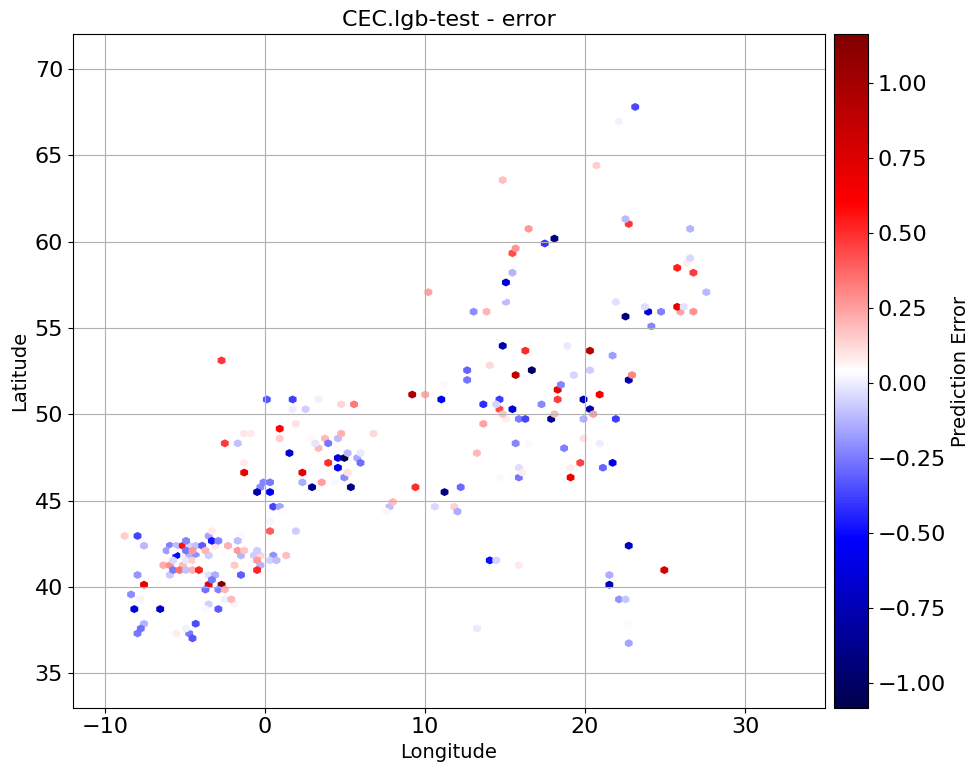

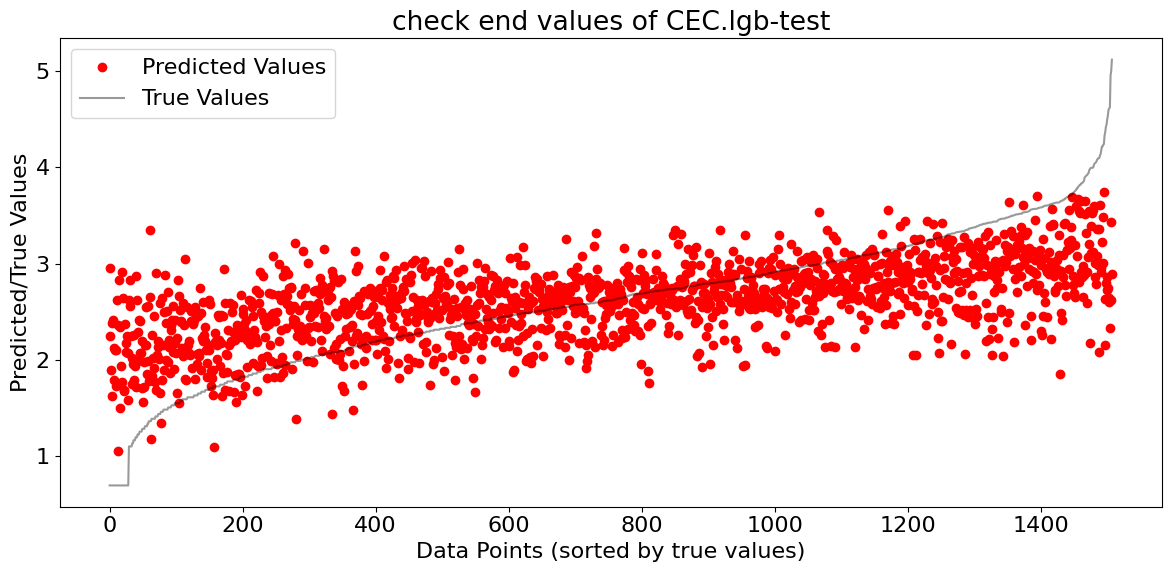

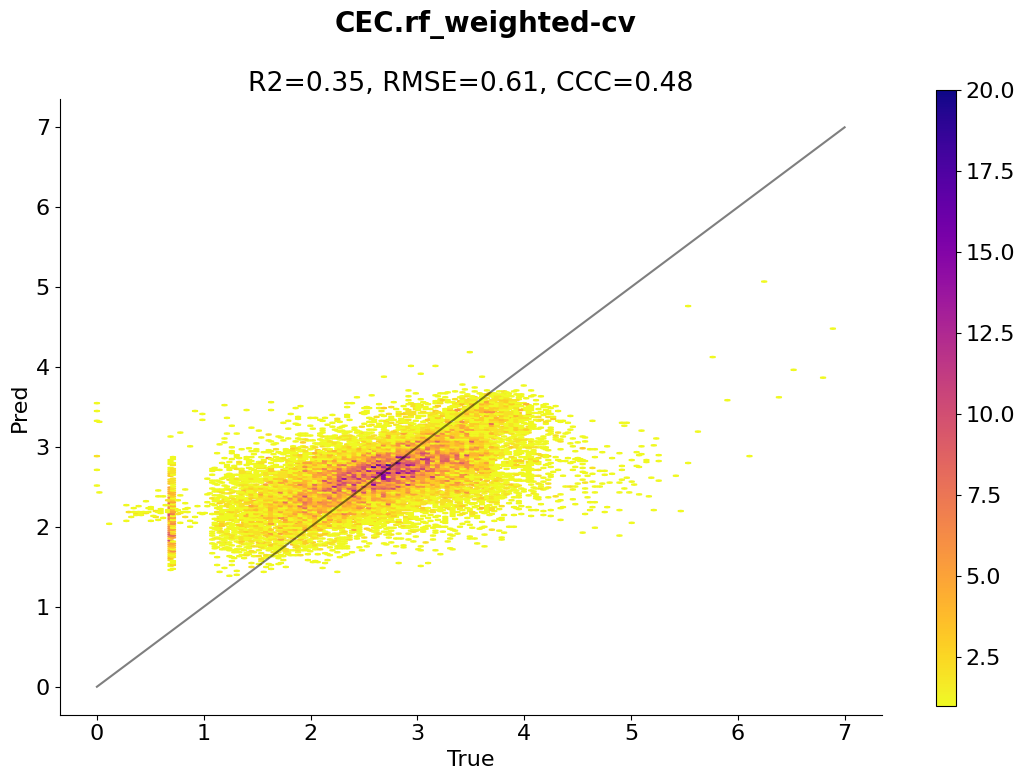

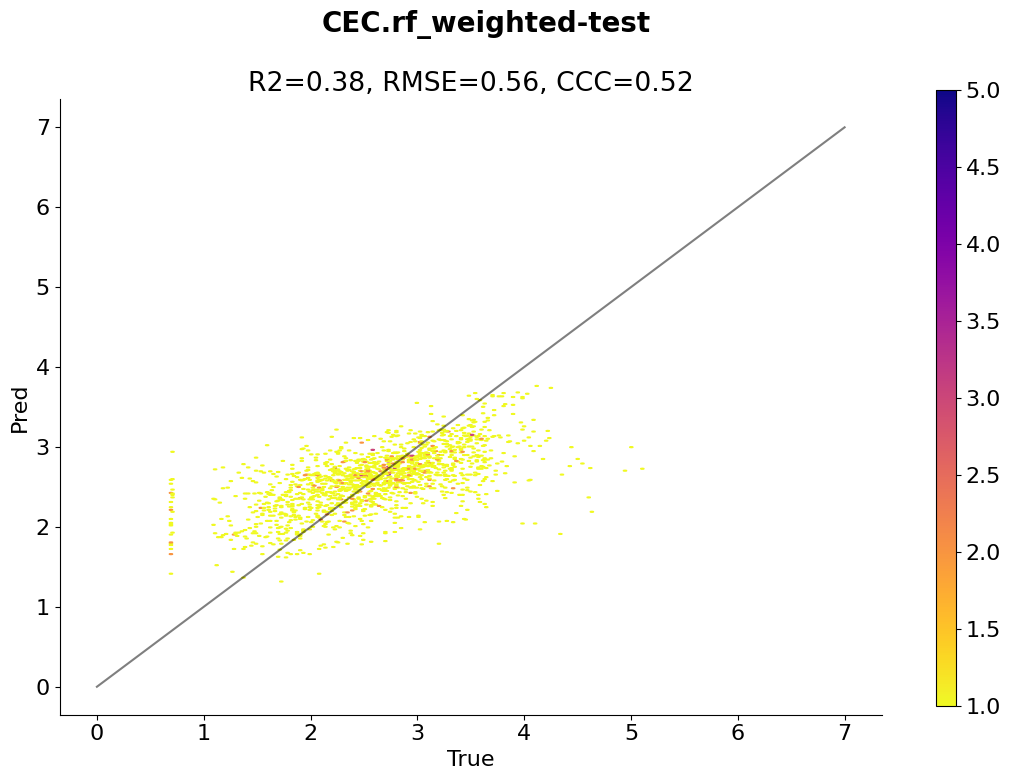

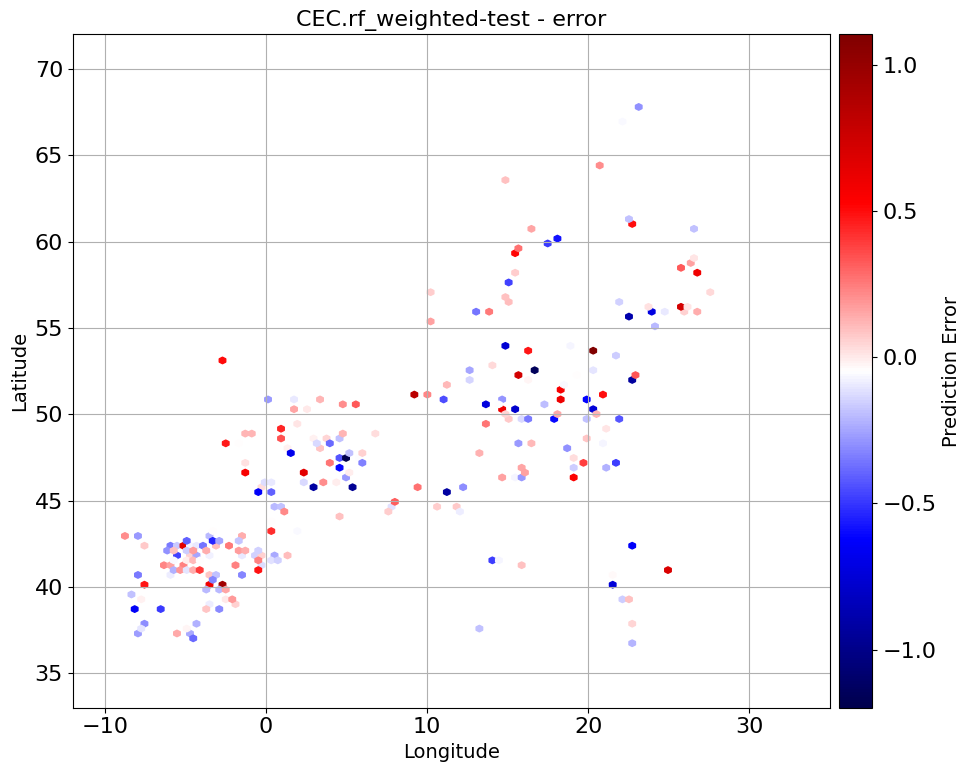

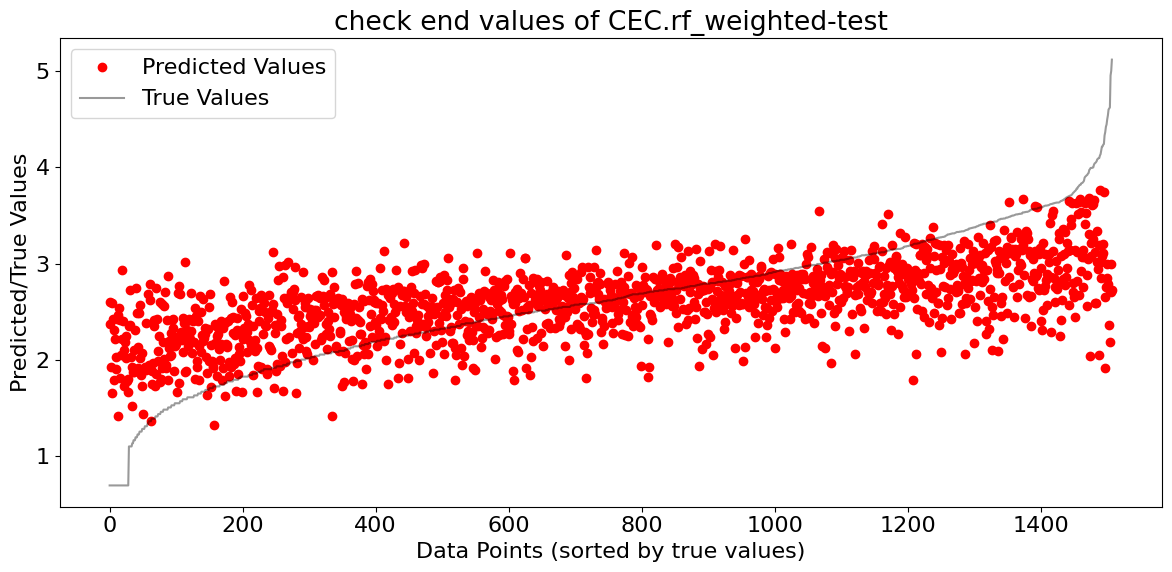

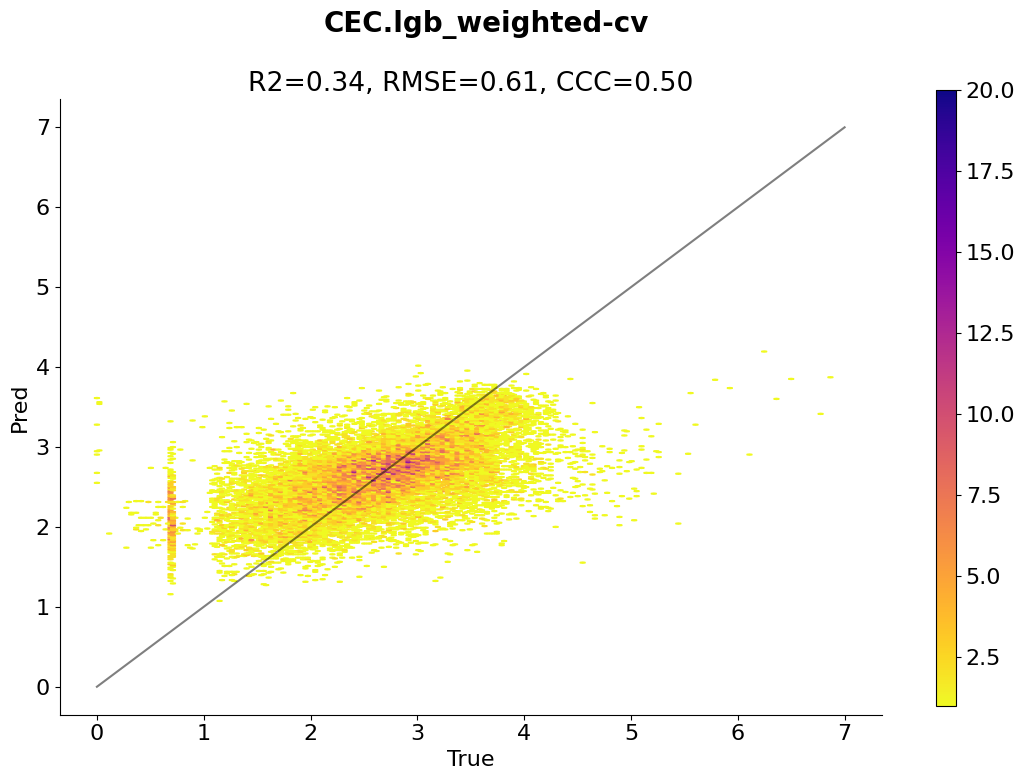

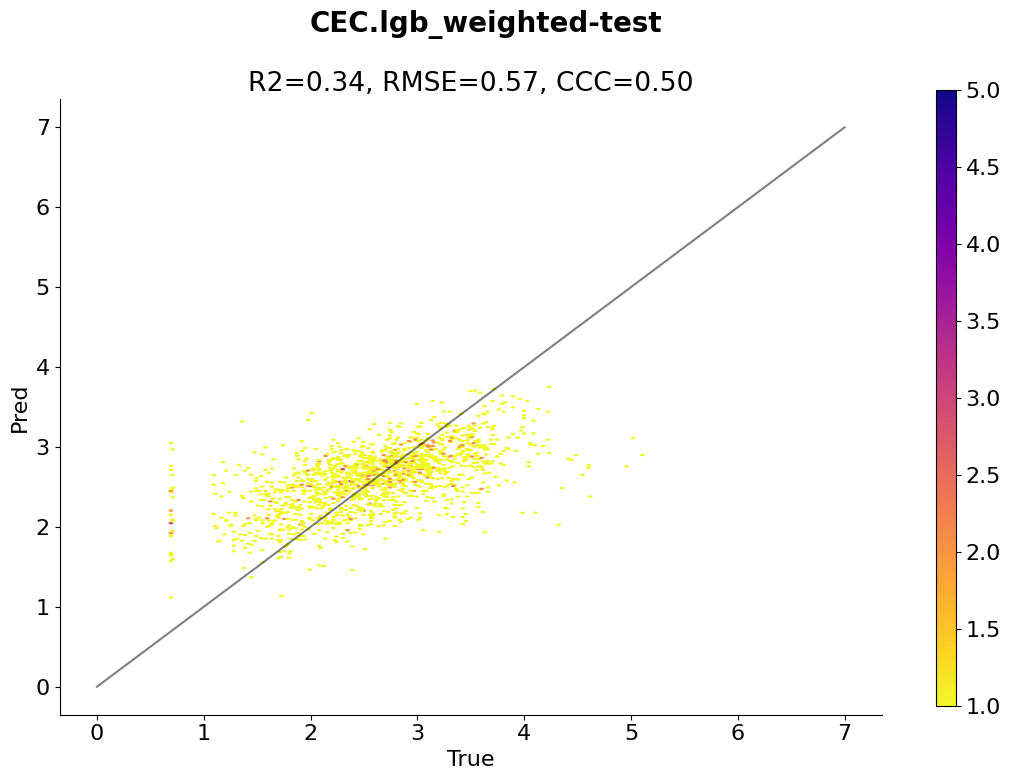

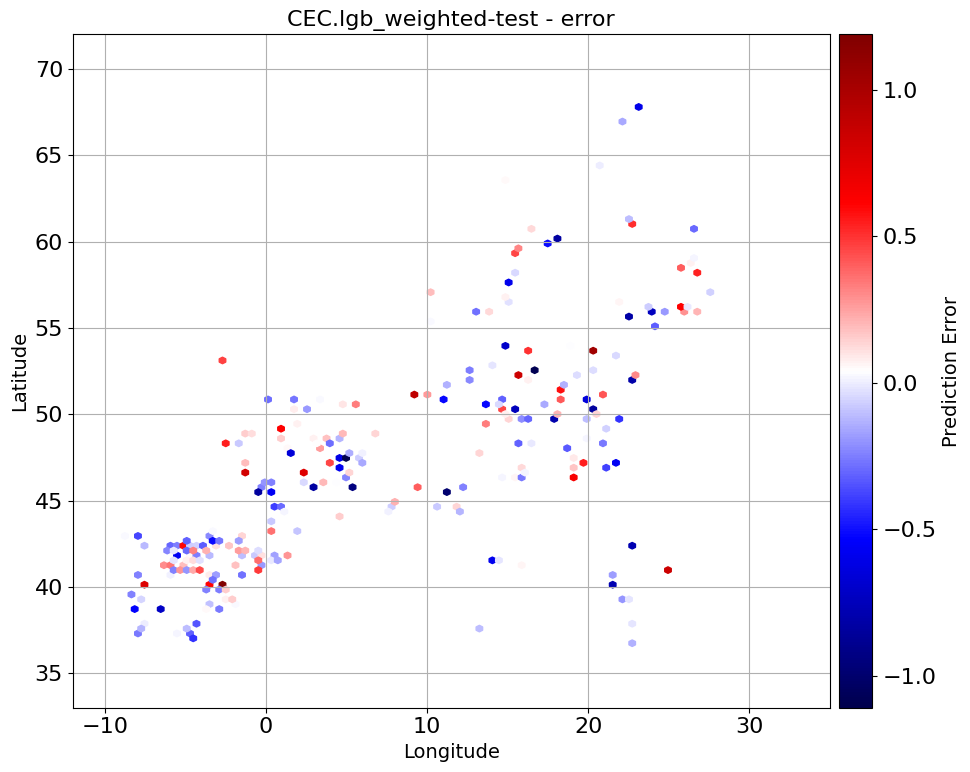

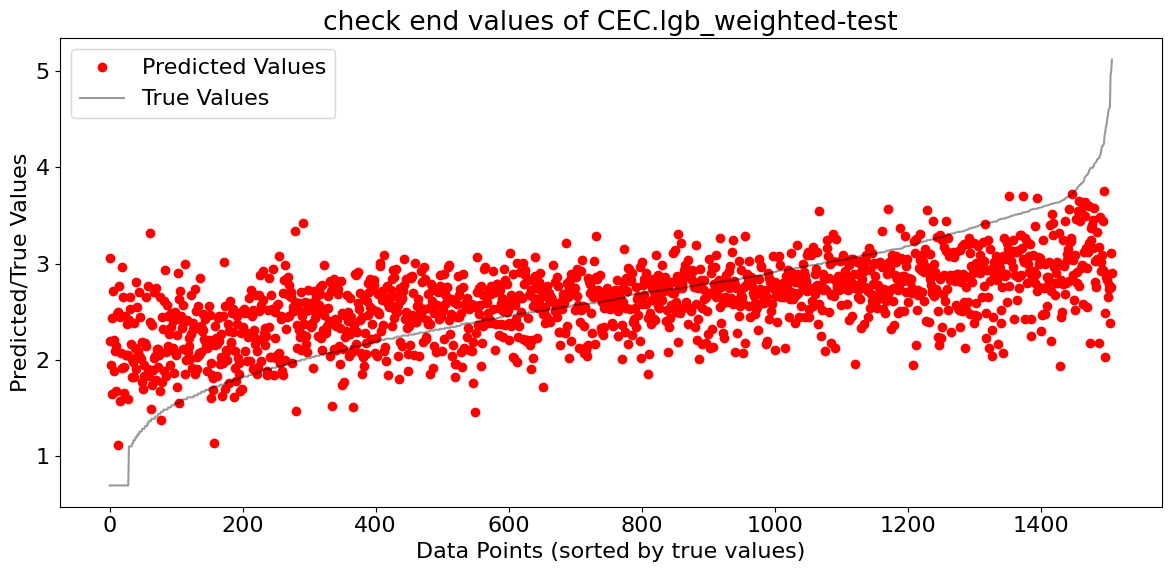

/home/opengeohub/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opengeohub/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/opengeohub/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [5]:
import warnings
warnings.filterwarnings('ignore')

for ii in [8,9]:#range(len(prop_list)):
    print(f'processing {prop_list[ii]}')
    prop = prop_list[ii]
    output_folder = f'/mnt/primus/xuemeng_tmp_harbour/soc/results/{prop}'
    run_benchmark(folder=folder,
                  output_folder=output_folder,
                  space=space_list[ii],
                  prop=prop,
                  filt=filt_list[ii])